In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv(r'C:/m.py/insurance.csv')

# Check the number of rows and columns
print("Number of rows and columns:")
print(df.shape)

# Handle missing values (if any)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Number of rows and columns:
(1338, 7)
Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


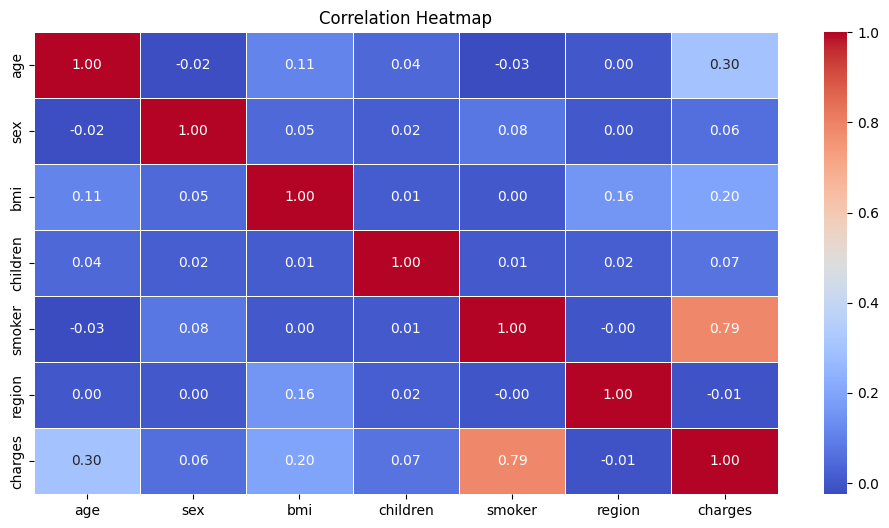

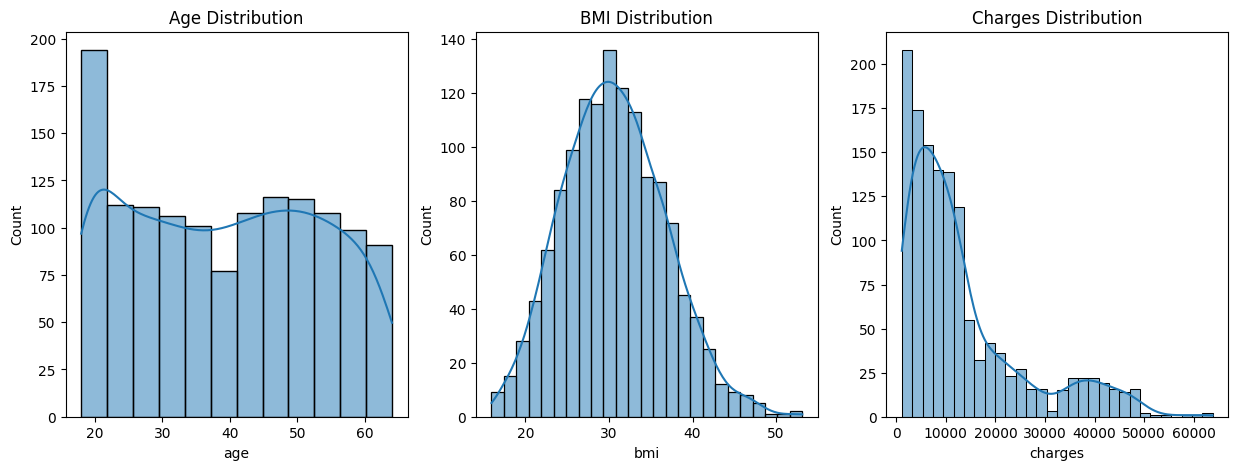

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

# Step 3: Feature Engineering
# Standardize the continuous features
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])


In [13]:
# Step 3: Feature Engineering
# Standardize the continuous features
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])


In [14]:
# Step 4: Model Selection
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

# Print model evaluation metrics
print("\nModel Evaluation Metrics:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  R² Score: {metrics['R²']:.2f}")
    print()


Model Evaluation Metrics:
Linear Regression:
  MSE: 33635210.43
  MAE: 4186.51
  R² Score: 0.78

Decision Tree:
  MSE: 44568235.63
  MAE: 2963.97
  R² Score: 0.71

Random Forest:
  MSE: 20724737.52
  MAE: 2462.91
  R² Score: 0.87

Gradient Boosting:
  MSE: 18994440.01
  MAE: 2447.56
  R² Score: 0.88



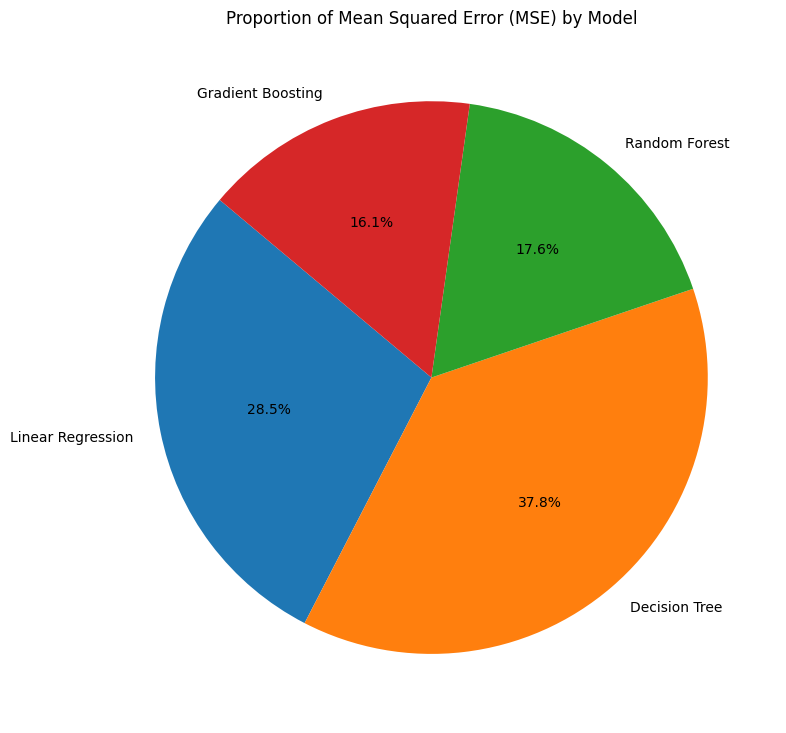

In [15]:
# Create pie charts for MSE, MAE, and R²
mse_values = [metrics['MSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]
models_names = list(results.keys())

# MSE Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(mse_values, labels=models_names, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Mean Squared Error (MSE) by Model')
plt.tight_layout()
plt.savefig('mse_pie_chart.png', bbox_inches='tight')
plt.show()

In [ ]:
#